In [1]:
#this is to plot inside the notebook
%matplotlib inline

# Libraries you will be using in this assignment
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt

# Makes our plots look nicer
matplotlib.style.use("seaborn-notebook")

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

# Assignment 1 Part 0

This part of first assignment is meant to familiarize ourselves with the basics of data inspection and manipulation and the visualization of data. We will also implement a simple error function to compare how well different models fit the data.

##  Data Inspection

Let's first generate some data to have something to work with. Our data will consist of $x,y$ values. We will generate two datasets, 

- one is generated by a linear function.
- one generated by an exponential function.

In [2]:
X = np.linspace(0,1,25)
Y_linear = 0.2 + X * 0.3
Y_exponential = 0.2 + 0.5 * X**2

A first important question when handling data is the _shape_ of the dataset. Use the numpy function `shape` to determine the shape of our `X` array. Numpy is already imported (in the first cell) and for convenience named `np`, so you can use numpy functions with `np.` instead of `numpy.`.

<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
Store the shape of `X` into the variable `X_shape`. Make sure that your code passes the tests! (1 Point)
</p>
</div>

In [3]:
X_shape = X.shape

In [4]:
"""Check that X_shape is the  correct shape"""
assert(X_shape == (25,))

<div class="alert alert-info" role="alert">
<h1>Exercise 1 b)</h1>
<p>
What is the size of `X`? Use the numpy `size` function and store the result in the variable `X_size`. (1 Point)
</p>
</div>

In [5]:
X_size = np.size(X)

In [6]:
"""Check that X_size is the  correct size"""
assert(X_size == 25)

<div class="alert alert-info" role="alert">
<h1>Exercise 1 c)</h1>
<p>
`np.shape` and `np.size` returned two different types. Use `type()` to determine the types of `X_size` and `X_shape`. (1 Point)
</p>
</div>


In [7]:
type_X_size = int
type_X_shape = tuple

# YOUR CODE HERE

# YOUR CODE HERE


In [8]:
"""Check that type_X_size and type_X_shape are correct"""
assert(type_X_size is int)
assert(type_X_shape is tuple)

In nearly all cases, the data we measure or collect is noisy. To simulate noisy data we will add some random noise to our data.

<div class="alert alert-info" role="alert">
<h1>Exercise 2)</h1>
<p>
Generate an array of random normal noise and add it to our the linear and exponential data.
</p>
</div>

## Hints 
Generate an array `noise` of the appropriate size. The noise should be [random normal](https://en.wikipedia.org/wiki/Normal_distribution), i.e. generated from a normal distribution ($N(\mu, \sigma^2)$) with a _variance_  ($\sigma^2$) of $0.01$ and a _mean_ ($\mu$) of $0$.

First store the noise variance in a variable `noise_variance`. Then use numpy's `np.random.randn` to generate the noise values and store them in a variable `noise`. 

Finally, add `noise` to `Y_linear` and `Y_exponential` and create two new variables `Y_linear_noisy` and `Y_exponential_noisy`.

Remember that:
- `noise` has to have the _same_ size as our `X` and `Y` data.
- `np.random.randn` generates random points from $N(\mu = 0, \sigma^2 = 1)$. We want a variance different from $\sigma^2 = 1$! Check the documentation of `np.random.randn` on how to generate points with a different variance. Pay close attention to the example on how $\sigma^2$ is used to generate the samples in the numpy documentation!
- If you are unsure if you pass the correct $\sigma$, generate an array of a few hundred points and check the empirical variance with `np.var()`. The empirical variance should be very close to the true variance!

(4 Points)

In [9]:
noise_variance = 0.01      
noise = ((noise_variance)**(1/2)) * np.random.randn(X_size)  
Y_linear_noisy = Y_linear+noise      
Y_exponential_noisy = Y_exponential+noise 

In [10]:
assert(np.size(noise) == 25)

# Visualizing our Functions

An important part of data analysis is visualizing data and results. 

<div class="alert alert-info" role="alert">
<h1>Exercise 3)</h1>
Plot `Y_linear_noisy` and `Y_exponential_noisy` against their respective `X` values. Use the `plt` alias for `Matplotlib.pyplot` that we imported in the first cell of the notebook.
<p>

</p>
</div>

- Plot both the exponential and the linear function as scatter plots in respective subplots (i.e. in __one__ figure)!
- Set labels for both $x$ and $y$ axes.
- Set a title for the figure (pick a large font size).
- Set titles for the subplots, indicating the generating function (linear/exponential).
- Set the figure size to 12 x 6.
- Set all subplot axes to span $(0,1)$ for both the $x$ and $y$ axis.
- Make the subplots share the y-axis.
- Plot the **noise-free function** for each function in the respective subplot as a line plot. Pick a different color for true function and scatter points.
- Set a legend for the subplots indicating noise-free and noisy data.


You can get extra points (up to 2) for any other improvements on the presentation. Some ideas:
- Remove the unnecessary box-lines for the top- and right-side of the subplots.
- Improve the size of scatter-points and the noise-free line to make the plot more visible.

(5 Points)

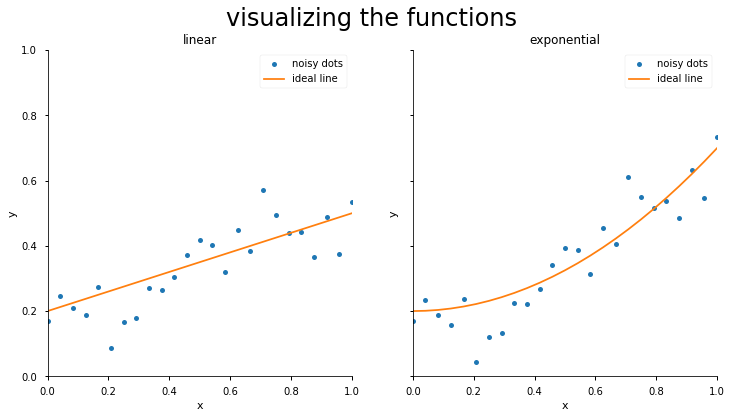

In [11]:
plt.figure(1,figsize=(12,6))
plt.suptitle('visualizing the functions',fontsize=24)

ax=plt.subplot(121)
plt.plot(X,Y_linear_noisy,"o",markersize=5,label="noisy dots")
plt.plot(X,Y_linear,label="ideal line")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('linear')
plt.legend()

ax2=plt.subplot(122)
ax2.plot(X,Y_exponential_noisy,"o",markersize=5,label="noisy dots")
ax2.plot(X,Y_exponential,label="ideal line")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('exponential')
plt.legend()

ax2.get_shared_y_axes().join(ax, ax2)
ax2.set_yticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Models & Model Errors

We will explore the different models you've encountered in the lectures and labs, as well as how to critically evaluate them, in part 1 of the assignment. Here we only want to get more familiar with the general process of defining, training and evaluating a model. 

Our first model is a simple __Linear Regression__ model. Linear regression assumes that the target values $y$ are generated by $y = X \beta +intercept+ \epsilon$.

That means that the target values $y$ are the result of a multiplication of the predictor values $X$ with the $\beta$ coefficient and the addition of an intercept. Finally, linear regression allows for an additive error term $\epsilon$.

You do not have to worry about the details of linear regression. Here we will simply compare this model with a more complex model that you encountered in the lecture, a multilayer perceptron (MLP).


Both linear regression and multilayer perceptrons are simple models and we could implement them ourselves (and this is a good exercise to test your understanding how the algorithms work). For convenience, here we won't implement anything ourselves, and we use the implementation provided by the `sklearn` package.

We import the relevant models and specify the default models for each dataset with:

`linear_regression_model = LinearRegression()` and `mlp_model = MLPRegressor()`

In [12]:
# Import the MLP and linear regression models
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg_model_linear = LinearRegression()
lin_reg_model_exponential = LinearRegression()

# Many parameters can be specified for the models, here we pick all the defaults but
# select an iterative solver "lbfgs" for the MLP models.
# One plausible alternative solver to use would be gradient descent, which we introduced in the lecture.
# The selection of this particular solver is simply as an example and you do not need to worry about why a 
# particular solver is/was used.

mlp_model_linear = MLPRegressor(solver='lbfgs')
mlp_model_exponential = MLPRegressor(solver='lbfgs')

Now we will fit our two models to the linear and exponential data. Since sklearn models assumes a particular shape for the feature array we need to reshape our data, using `np.reshape(-1,1)`, transforming our `(250,)` shaped data to be `(250,1)` shaped.

In [14]:
mlp_model_linear.fit(X.reshape(-1, 1), Y_linear_noisy)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
mlp_model_exponential.fit(X.reshape(-1, 1), Y_exponential_noisy)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
lin_reg_model_linear.fit(X.reshape(-1, 1), Y_linear_noisy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lin_reg_model_exponential.fit(X.reshape(-1, 1), Y_exponential_noisy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that we fitted the models we are interested in inspecting how well the models fit the data.

Remember how the linear regression model fitted the $y$ values as a result of the multiplication with a coefficient $\beta$ and an intercept? We can inspect these values after fitting the model and compare them to the true data.

After training (fitting the model) on the linear data, the coefficient for the linear regression model is:

In [18]:
lin_reg_model_linear.coef_

array([0.35026614])

And the intercept is:

In [19]:
lin_reg_model_linear.intercept_

0.16112669615625444

Which shows that the model learned something about the true relationship of the data, since the fitted slope and intercept are (somewhat) close to the real values ($0.3$ and $0.2$).

## Predictions

We can also inspect how our models predict values $y$ for the learned $x$ values and compare them to the true $y$ values (much more on this in part 1 of the assignment).

We predict the $y$ values for our two models for the linear data simply by calling `.predict` on our model (and remember we need to reshape the data so that sklearn accepts it).

In [20]:
lin_reg_pred_lin = lin_reg_model_linear.predict(X.reshape(-1,1))
mlp_pred_lin = mlp_model_linear.predict(X.reshape(-1,1))

And the same for the exponential data:

In [21]:
lin_reg_pred_exp = lin_reg_model_exponential.predict(X.reshape(-1, 1))
mlp_pred_exp = mlp_model_exponential.predict(X.reshape(-1,1))

# Visualizing Predictions

<div class="alert alert-info" role="alert">
<h1>Exercise 4)</h1>
<p>
Now it's your go! Plot the predictions that we just calculated for all our models. Plot predictions for both MLP and linear regression on both functions. 
</p>
</div>


As before, use the `plt` alias for `Matplotlib.pyplot` that we imported in the first cell of the notebook and plot all results in __one figure__. Create two subplots, one for the predictions for the linear data and one for the predictions of the exponential data. 
Then:
- Plot the true, noisy data for linear and exponential.
- Plot the MLP and linear regression predictions on top of the true data as line plots (in their respective subplots). Pick clearly distinguishable colors if necessary.
- Set the $x$ and $y$ labels.
- Set a title for the figure (pick a large font size).
- Set titles for the subplots, indicating the generating function (linear & exponential).
- Set the figure size to 12 x 6.
- Set all subplot axes to span $(0,1)$ for both the $x$ and $y$ axis.
- Make the subplots share the y-axis.
- Set a legend for the subplots indicating the true data, the MLP predicton and the linear regression prediction.

(4 Points)

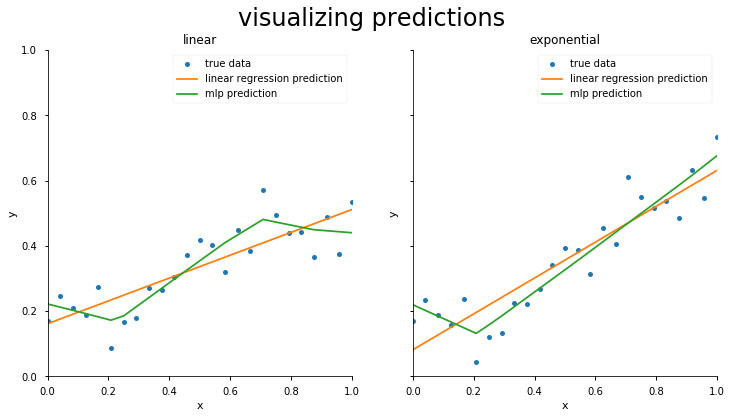

In [22]:


plt.figure(1,figsize=(12,6))
plt.suptitle('visualizing predictions',fontsize=24)

ax=plt.subplot(121)
plt.plot(X,Y_linear_noisy,"o",markersize=5,label="true data")
plt.plot(X,lin_reg_pred_lin,label="linear regression prediction")
plt.plot(X,mlp_pred_lin,label="mlp prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('linear')
plt.legend()

ax2=plt.subplot(122)
ax2.plot(X,Y_exponential_noisy,"o",markersize=5,label="true data")
ax2.plot(X,lin_reg_pred_exp,label="linear regression prediction")
ax2.plot(X,mlp_pred_exp,label="mlp prediction")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('exponential')
plt.legend()

ax2.get_shared_y_axes().join(ax, ax2)
ax2.set_yticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Calculating Model Errors

The plots give us a visual indication of how good our model is at capturing the data. In addition to this visual description we are interested in having a estimate of how good our model is. One simple method to determine how good our prediction is to calculate how close our predictions are on average to the true data. One way to determine this measure is via the mean squared error of our prediction (MSE, https://en.wikipedia.org/wiki/Mean_squared_error).

<div class="alert alert-info" role="alert">
<h1>Exercise 5)</h1>
<p>
Implement the MSE in the function `calculate_MSE` below.
</p>
</div>


The function should take two numpy arrays and calculate the MSE:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_{predicted} - Y_{true})^2
$$

Make sure that your implementation operates __in vectorized form__, i.e. __do not__ loop through all values (as the formula suggests). Instead directly subtract the two arrays and use numpy functions.
__Do not__ use scikit-learn's implementation of MSE or any other ready-made implementation, but stick to numpy functions. Non-vectorized implementations, or implementations using external implementations, will not receive full marks!

(5 Points)

In [25]:
def calculate_MSE(y_predicted, y_true):
    """
    Calculates the MSE of a model
    
    Parameters:
    y_predicted are the predicted outputs of our model (numpy vector of values)
    y_true are the true values (numpy vector of values)
   
    returns the MSE, which is a scalar value (a number)
    
    """    
    return np.mean( (y_predicted-y_true) **2)
    

In [26]:
"""Check that the MSE function returns the correct output"""
assert(calculate_MSE(np.array([0]),np.array([0])) == 0.0)
assert(calculate_MSE(np.array([1]),np.array([0])) == 1.0)
assert(calculate_MSE(np.array([0,0,0]), np.array([1,1,1])) == 1.0)

from nose.tools import assert_raises
assert_raises(TypeError, calculate_MSE, [1,2,3], [4,5,6])
assert(calculate_MSE(np.array([1,2,3]), np.array([4,5,6]))==9)

Let's calculate the errors for our two models for both functions with our new MSE function.

In [27]:
mlp_error_exponential = calculate_MSE(mlp_pred_exp, Y_exponential_noisy)
mlp_error_linear = calculate_MSE(mlp_pred_lin, Y_linear_noisy)

lin_reg_error_exponential = calculate_MSE(lin_reg_pred_exp, Y_exponential_noisy)
lin_reg_error_linear = calculate_MSE(lin_reg_pred_lin, Y_linear_noisy)


# Visualizing Model Errors

<div class="alert alert-info" role="alert">
<h1>Exercise 6)</h1>
<p>
Now plot the MSE errors as a bar plot.
</p>
</div>


As before, use the `plt` alias for `Matplotlib.pyplot` that we imported in the first cell of the notebook and plot all results in __one figure__. Create two subplots, one for the predictions for the linear data and one for the predictions of the exponential data.

- Set a title for the figure (pick a large font size).
- Set titles for the subplots, indicating the generating data (linear & exponential).
- Set meaningful marks/labels for the $x$ axis.
- Set the figure size to 12 x 6.
- Make the subplots share the y-axis.

You might need some help on how to structure the data for plotting, as Matplotlib's bar plot takes $x$ values and corresponding heights. One easy way to get our data in the right shape (and solve one of the tasks above) is to use the names of the models as the the $x$ values (for example `["Linear Regression", "MLP"]`) and pack our MSEs into a list of heights (for example `[error_linear, error_mlp]` if `error_linear` is where our MSE is stored).


(5 Points)

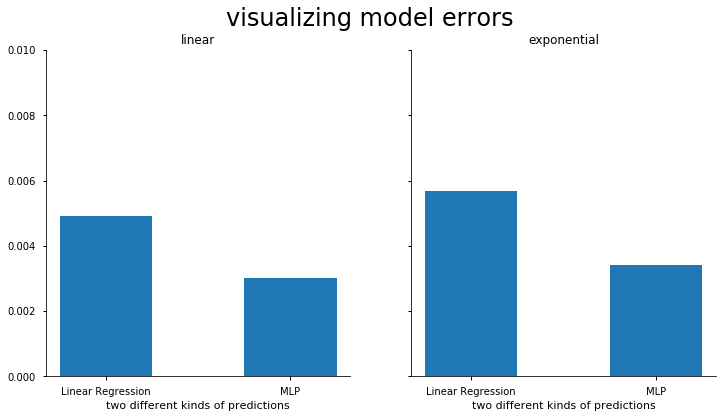

In [28]:
plt.figure(1,figsize=(12,6))
plt.suptitle('visualizing model errors',fontsize=24)

ax=plt.subplot(121)
plt.bar(["Linear Regression", "MLP"],[lin_reg_error_linear ,mlp_error_linear],0.5)
plt.xlabel('two different kinds of predictions')
plt.ylim(0, 0.01)
plt.title('linear')


ax2=plt.subplot(122)
plt.bar(["Linear Regression", "MLP"],[lin_reg_error_exponential,mlp_error_exponential],0.5)
plt.xlabel('two different kinds of predictions')
plt.ylim(0,0.01)
plt.title('exponential')

ax2.get_shared_y_axes().join(ax, ax2)
ax2.set_yticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

## Written Questions:

To finish Problem Set 1, please answer the following questions. For each question provide your reply in the cell below the question (indicated by `YOUR ANSWER HERE`). Answers can be brief, but should be **full sentences**!

<div class="alert alert-info" role="alert">
<h1>Question 1)</h1>
<p>
Compare the errors of MLP and linear regression for the exponential data and explain in your own words why it makes sense that the MLP error is lower than the linear error. Compare the prediction of the MLP and the linear regression models or have a look at the definitions of both models to make your argument. (2 Points)
</p>
</div>



MLP made about 40% less errors than linear regression did for the exponential data.
The MLP model does not need to predict data linearly while linear regression has to.So the MLP can avoid more errors.

<div class="alert alert-info" role="alert">
<h1>Question 2)</h1>
<p>
Have a look at the errors and predictions for both linear and exponential data for MLP and linear regression.

Would you expect both models to perform equally well for some data? What kind of data should be well modeled by a linear regression and MLP alike? 
(2 Points)
</p>
</div>

Yes,I would.
If the data is linearly distributed and there is not much noise.